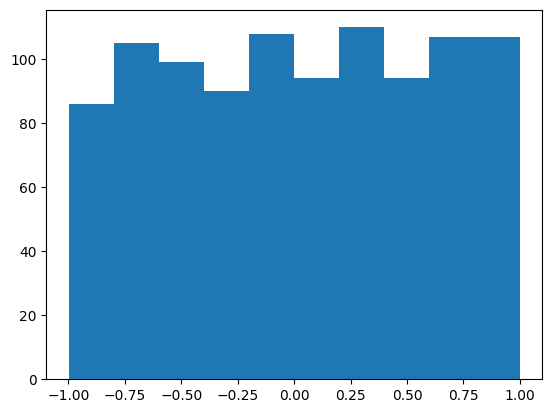

In [4]:
from samplers import get_data_sampler, UniformSampler
from tasks import *

set_of_xs = []
data_sampler = UniformSampler(1)
data = data_sampler.sample_xs(1, 1000, 1).squeeze().squeeze()
import matplotlib.pyplot as plt

plt.hist(data)
plt.show()

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


torch.Size([1000000, 10, 1])
torch.Size([1000000, 10])
torch.Size([10000000])


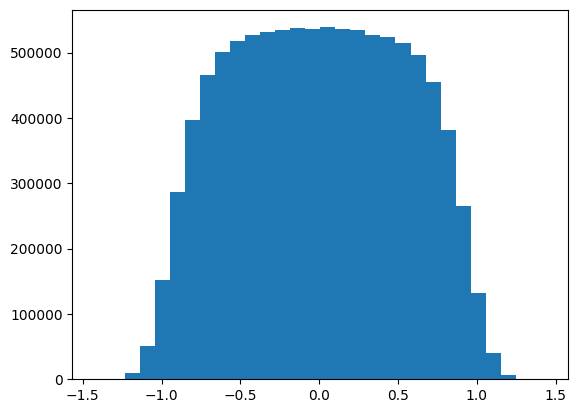

In [6]:
data =  data_sampler.sample_xs(10, 1000000, 1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1000000, basis_dim=1, different_degrees=False, lowest_degree=1, highest_degree=1)
print(data.shape)
ys = task.evaluate(data).squeeze()
print(ys.shape)
ys = ys.reshape(-1)
print(ys.shape)
plt.hist(ys, bins=30)
plt.show()

tensor([[ 0.0244,  0.6733, -0.1397, -0.0173,  0.1453],
        [-0.3495,  0.2926,  0.0219, -0.2787,  0.0573],
        [-0.1520,  0.3084, -0.0411,  0.4801, -0.0183],
        ...,
        [-0.1085,  0.3570,  0.3854,  0.1057, -0.0434],
        [-0.0272, -0.0543,  0.7240, -0.1562,  0.0383],
        [ 0.0942,  0.0476, -0.7352, -0.1182, -0.0048]])


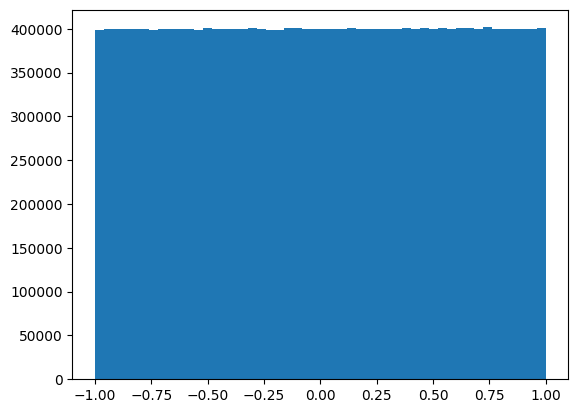

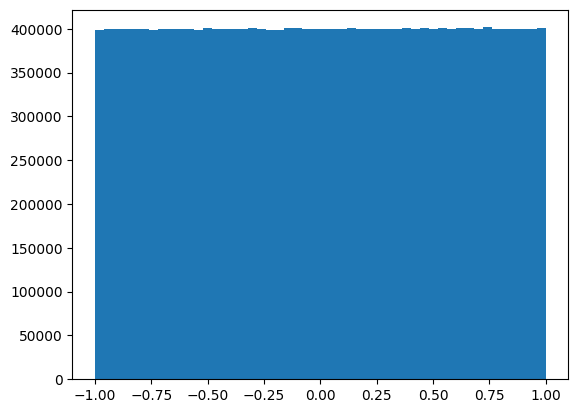

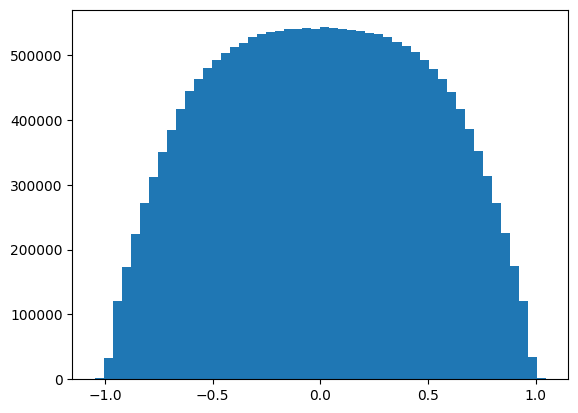

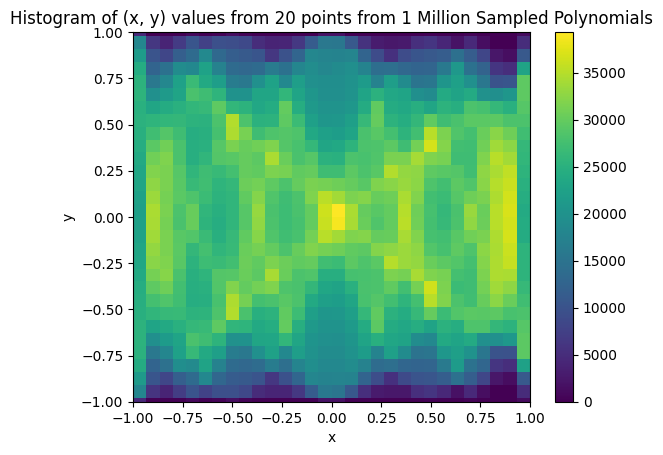

In [24]:
import numpy as np
from tasks import get_task_sampler, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(20, 1000000, 1)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1000000, basis_dim=4, different_degrees=True, lowest_degree=1, highest_degree=4)
ys = task.evaluate(data).squeeze()
ys = ys.reshape(-1)
data = data.reshape(-1)
plt.hist(data, bins=50)
plt.show()
data = data.numpy()
ys = ys.numpy()
plt.hist(data, bins=50)
plt.show()
plt.hist(ys, bins=50)
plt.show()
selected_ys = ys[data < 0.5]
selected_data = data[data < 0.5]
fig = plt.figure()
ax = fig.add_subplot(111)
counts,xedges,yedges,img = ax.hist2d(data,ys, bins=[30,30])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram of (x, y) values from 20 points from 1 Million Sampled Polynomials")
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.colorbar(img)
plt.show()